# 02.半径

上一篇已经完成了，对于一个分子Phe的最简模式的3D展示。

现在来加一些属性。

例如半径

In [22]:
#%matplotlib notebook
plot_mol(phe_txt)

RDKit WARNING: [10:40:07] obj01: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


<IPython.core.display.Javascript object>

原子半径详解：

1. Covalent Radii：一个原子的共价半径可以通过测量一对共价键合原子之间的键长来确定：如果这两个原子是同一种类的，那么共价半径只是键长的一半。


+ Van-der-Waals Radii：范德华半径由接触分子中未结合原子之间的接触距离确定。


+ Atomic-Ionic Radii：这些是原子的“真实”半径，从真实晶体和分子的键长测量，并考虑到一些原子会带电的事实。例如，氯（Cl-）的原子离子半径大于其原子半径。原子A和B之间的键长是原子半径的总和， dAB=rA+rB


+ Crystal Radii：也许最权威和最受尊重的原子半径集是香农和普雷维特（1969年）发表的“晶体”半径-所有晶体学中引用最多的论文之一-香农（1976年）后来修订的值。这些数据最初来源于碱卤化物的研究，适用于大多数无机结构，并为CrystalMaker的默认元素表提供了基础。

关于原子颜色定义：


| 元素                                                         | 用色                                                         |      |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ---- |
| [氢](https://zh.wikipedia.org/wiki/氫)                       | [白色](https://zh.wikipedia.org/wiki/白色)                   |      |
| [碳](https://zh.wikipedia.org/wiki/碳)                       | [黑色](https://zh.wikipedia.org/wiki/黑色)                   |      |
| [氮](https://zh.wikipedia.org/wiki/氮)                       | [蓝色](https://zh.wikipedia.org/wiki/藍色)                   |      |
| [氧](https://zh.wikipedia.org/wiki/氧)                       | [红色](https://zh.wikipedia.org/wiki/紅色)                   |      |
| [硫](https://zh.wikipedia.org/wiki/硫)                       | [深黄色](https://zh.wikipedia.org/w/index.php?title=深黃色&action=edit&redlink=1) |      |
| [磷](https://zh.wikipedia.org/wiki/磷)                       | [紫色](https://zh.wikipedia.org/wiki/紫色)                   |      |
| [卤素](https://zh.wikipedia.org/wiki/鹵素)                   | [绿色](https://zh.wikipedia.org/wiki/綠色)                   |      |
| [金属](https://zh.wikipedia.org/wiki/金屬)（[钴](https://zh.wikipedia.org/wiki/钴)、[铁](https://zh.wikipedia.org/wiki/铁)、[镍](https://zh.wikipedia.org/wiki/镍)） | 银色                                                         |      |

In [3]:
%matplotlib notebook
# 设置一个字典存储相关原子颜色信息
atom_color = {'C':'#8B0000',
'H':'#FFFFFF',
'O':'#FF0000',
'N':'#0000FF',
'S':'#FFFF00',
'P':'#800080',
'M':'#C0C0C0',
'Halogen':'#008000'
}

In [4]:
# 设置一个字典存储相关原子半径信息
# 卤素原子使用Cl替代
# 金属原子使用Ag替代
# 半径单位为埃，1埃=0.1纳米
# 半径依次为：原子半径，离子半径，共价半径，范德华半径，晶体半径
atom_rdii= {
'C':[0.67,0.70,0.77,1.70,0.29],
'H':[0.53,0.25,0.37,1.20,0.10],
'O':[0.48,0.60,0.73,1.52,1.21],
'N':[0.56,0.65,0.75,1.55,0.30],
'S':[0.88,1.00,1.02,1.80,0.43],
'P':[0.98,1.00,1.06,1.80,0.31],
'M':[1.65,1.60,1.53,1.72,1.29],
'Halogen':[0.79,1.00,0.99,1.75,1.67]
}

In [5]:
# 一些坐标参数
import numpy as np
z=np.linspace(1,20,5)

coord=[]

for n in z:
    coo = [0,10,n]
    coord.append(coo)
#coord = [[1,1,1]]
coord=coord*8

id_list = [241,242,243,244,245,246,247,248]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def plot_atom_surface(a,b,c,radius,color):
    #fig_m = plt.figure()
#    ax = fig_m.add_subplot(id,projection='3d')
    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v)) + a
    y = radius * np.outer(np.sin(u), np.sin(v)) + b
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v)) + c 
    # Plot the surface
    #ax.plot_surface(x, y, z, color = color)
    ax.scatter(a,b,c, marker="8",c=color)
    ax.plot_wireframe(x, y, z, rstride=10, cstride=10,color = color)
    #plt.show()

In [7]:
anno_li = ['Atom','Atomic-Ionic','Covalent','Vdw','Crystal']
import matplotlib.pyplot as plt
import numpy as np
fig_m = plt.figure()
fig_m.set_facecolor('white')
n=0
m=0
for i in atom_color:
  ax = fig_m.add_subplot(id_list[m], projection='3d')
  m = m+1
  h=0
  ax.set_title(i+' Atom')
  for radi in atom_rdii[i]:
    atom_now=coord[n]
    print(i,radi)
    print(coord[n])
    x=coord[n][0]
    y=coord[n][1]
    z=coord[n][2]
    plot_atom_surface(x,y,z,radi,atom_color[i])
    ax.text(x+2,y,z,anno_li[h])
    ax.text(x-5,y-5,z,radi)
    n=n+1
    ax.grid(False) 
    ax.set_xlim(-10,10) 
    ax.set_ylim(0, 20) 
    ax.set_zlim(0, 20) 
    # 加一些label相关标记
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    h=h+1
plt.show()


<IPython.core.display.Javascript object>

C 0.67
[0, 10, 1.0]
C 0.7
[0, 10, 5.75]
C 0.77
[0, 10, 10.5]
C 1.7
[0, 10, 15.25]
C 0.29
[0, 10, 20.0]
H 0.53
[0, 10, 1.0]
H 0.25
[0, 10, 5.75]
H 0.37
[0, 10, 10.5]
H 1.2
[0, 10, 15.25]
H 0.1
[0, 10, 20.0]
O 0.48
[0, 10, 1.0]
O 0.6
[0, 10, 5.75]
O 0.73
[0, 10, 10.5]
O 1.52
[0, 10, 15.25]
O 1.21
[0, 10, 20.0]
N 0.56
[0, 10, 1.0]
N 0.65
[0, 10, 5.75]
N 0.75
[0, 10, 10.5]
N 1.55
[0, 10, 15.25]
N 0.3
[0, 10, 20.0]
S 0.88
[0, 10, 1.0]
S 1.0
[0, 10, 5.75]
S 1.02
[0, 10, 10.5]
S 1.8
[0, 10, 15.25]
S 0.43
[0, 10, 20.0]
P 0.98
[0, 10, 1.0]
P 1.0
[0, 10, 5.75]
P 1.06
[0, 10, 10.5]
P 1.8
[0, 10, 15.25]
P 0.31
[0, 10, 20.0]
M 1.65
[0, 10, 1.0]
M 1.6
[0, 10, 5.75]
M 1.53
[0, 10, 10.5]
M 1.72
[0, 10, 15.25]
M 1.29
[0, 10, 20.0]
Halogen 0.79
[0, 10, 1.0]
Halogen 1.0
[0, 10, 5.75]
Halogen 0.99
[0, 10, 10.5]
Halogen 1.75
[0, 10, 15.25]
Halogen 1.67
[0, 10, 20.0]


<IPython.core.display.Javascript object>

如果你足够幸运的话

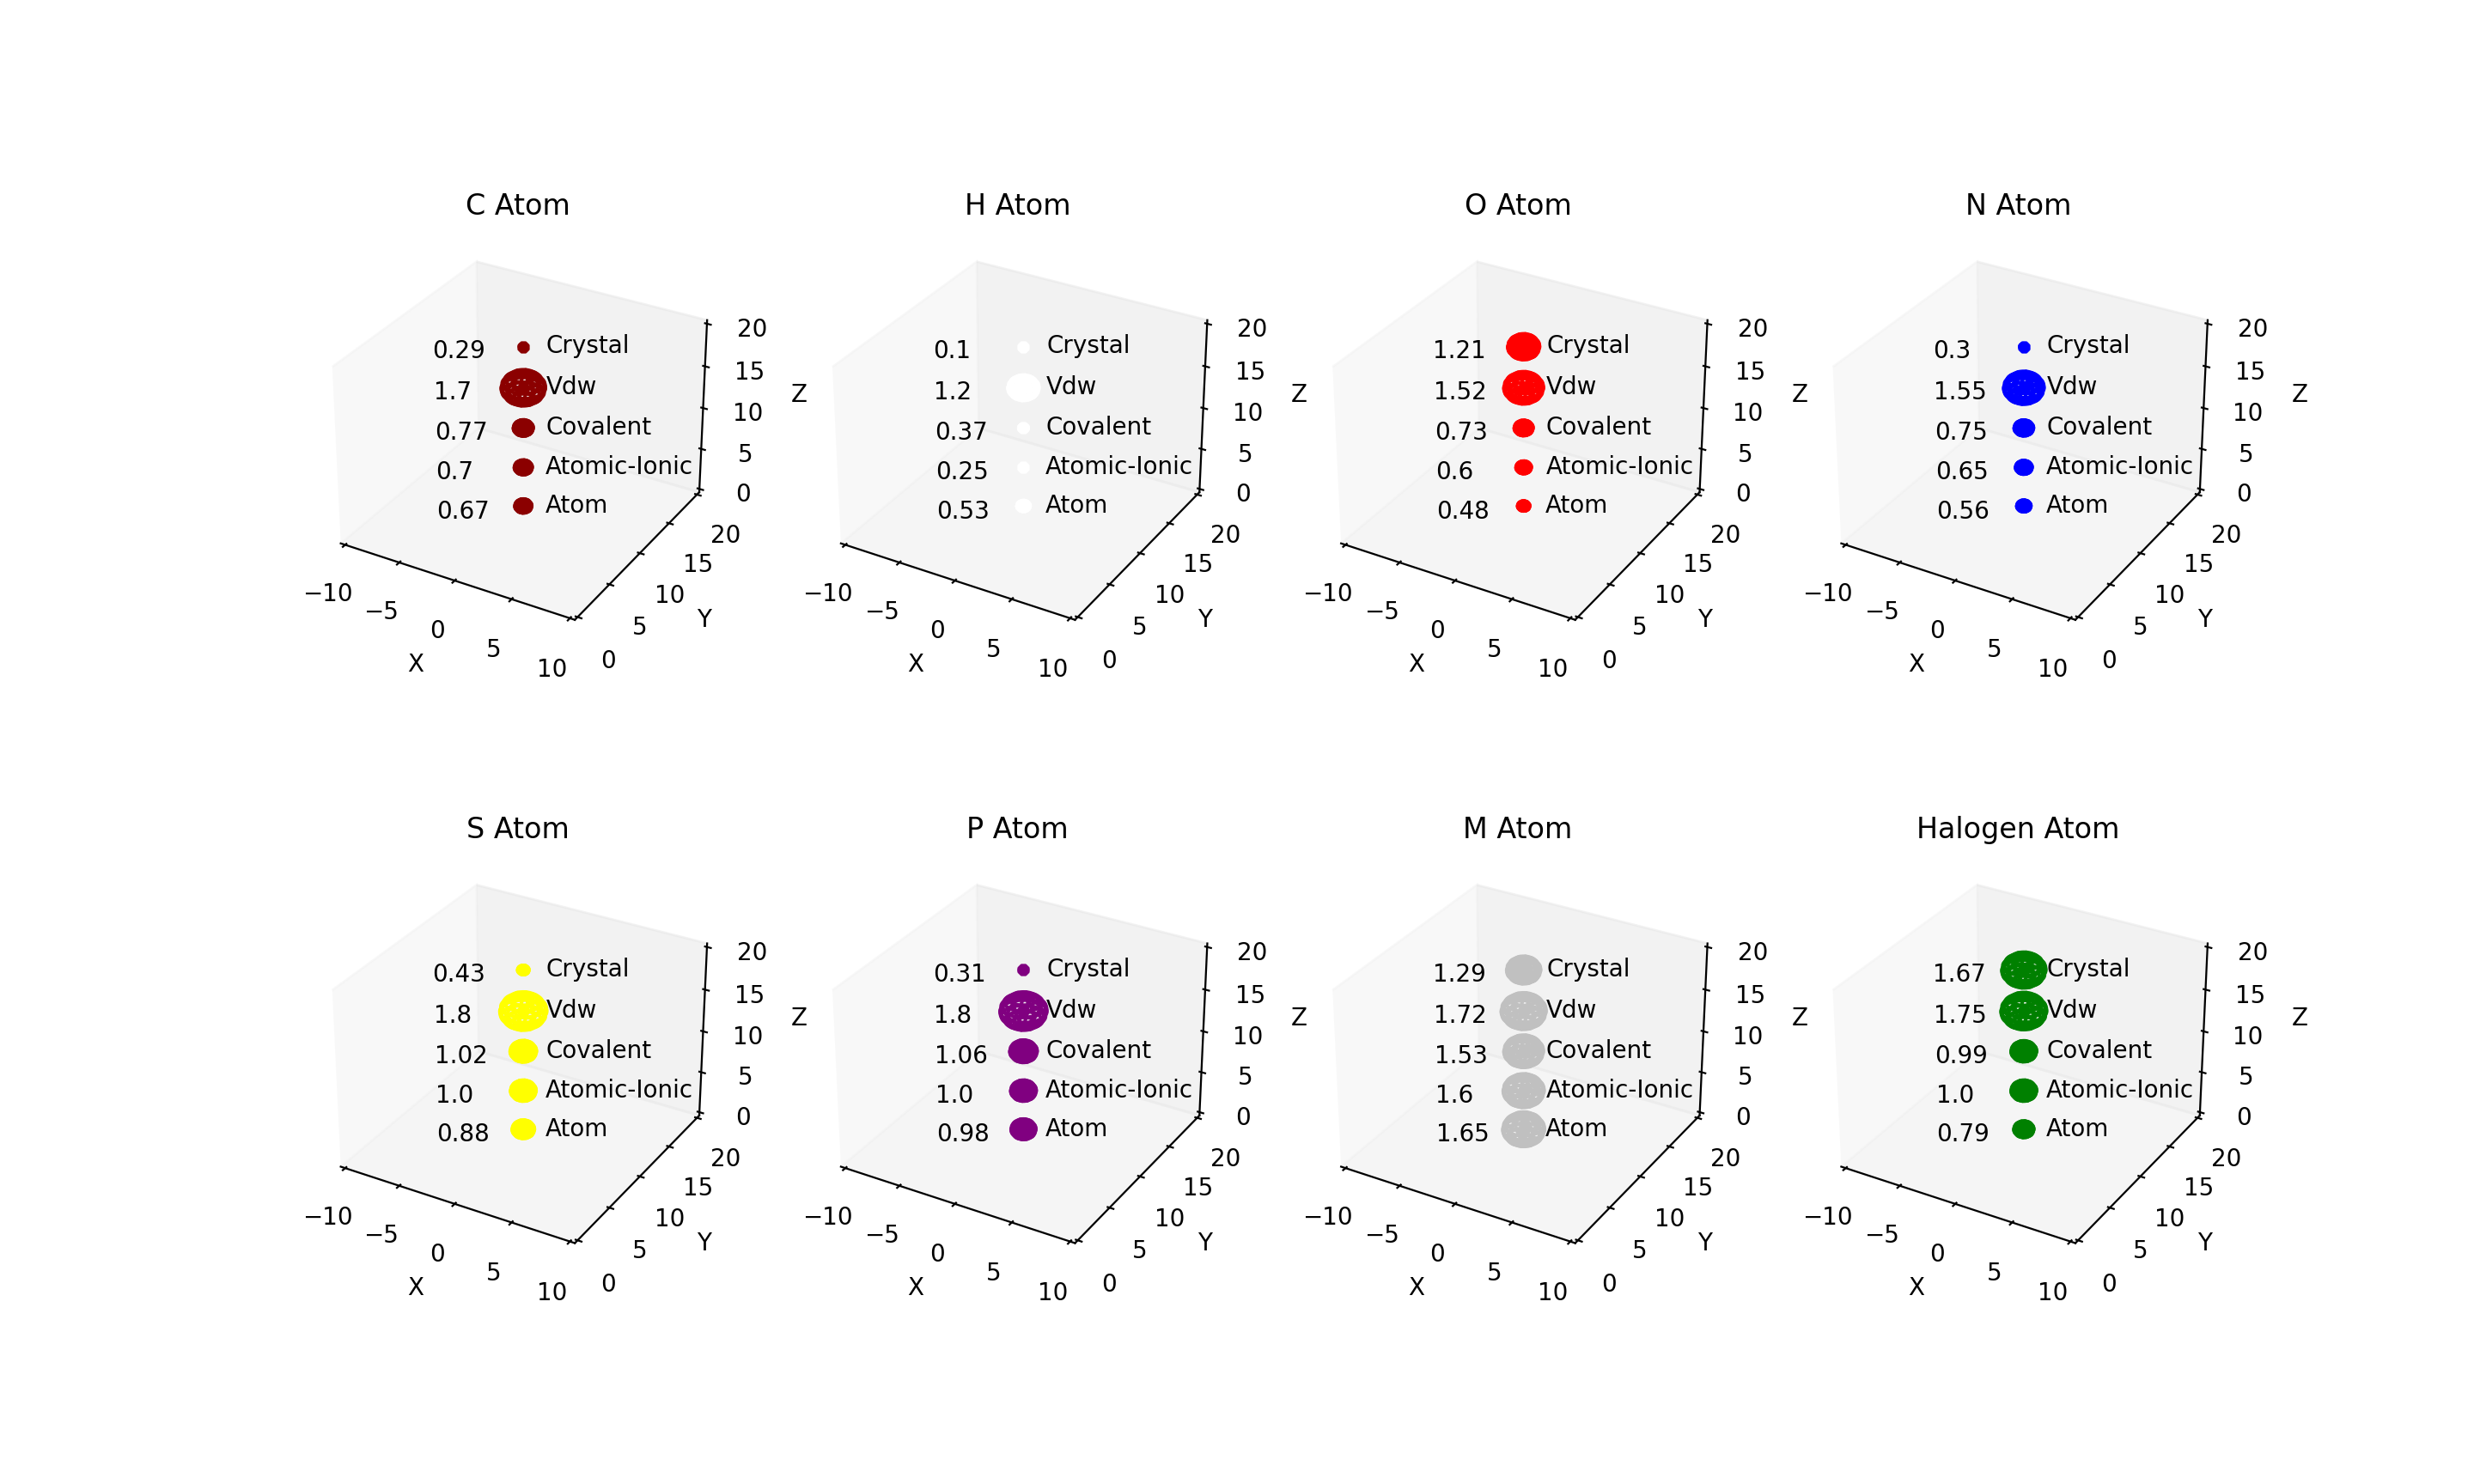

### **参考**：

1. 原子配色： https://zh.wikipedia.org/zh-hans/CPK配色
2. matplot颜色对照表：https://zhuanlan.zhihu.com/p/65220518
3. 原子半径：www.crystalmaker.com/support/tutorials/atomic-radii/index.html
4. 原子半径：http://sobereva.com/255

### **附加材料**：

| Atomic Number | Element Symbol | Atomic Radius [Å] | Ionic Radius [Å] | Covalent Radius [Å] | Van-der-Waals Radius [Å] | Crystal Radius [Å] |
| ------------- | -------------- | ----------------- | ---------------- | ------------------- | ------------------------ | ------------------ |
| 1             | H              | 0.53              | 0.25             | 0.37                | 1.20                     | 0.10               |
| 2             | C              | 0.67              | 0.70             | 0.77                | 1.70                     | 0.29               |
| 3             | N              | 0.56              | 0.65             | 0.75                | 1.55                     | 0.30               |
| 4             | O              | 0.48              | 0.60             | 0.73                | 1.52                     | 1.21               |
| 5             | S              | 0.88              | 1.00             | 1.02                | 1.80                     | 0.43               |
| 6             | Cl             | 0.79              | 1.00             | 0.99                | 1.75                     | 1.67               |
| 7             | P              | 0.98              | 1.00             | 1.06                | 1.80                     | 0.31               |
| 8             | Ag             | 1.65              | 1.60             | 1.53                | 1.72                     | 1.29               |